In [42]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [43]:
# References (under construction):

# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

# Importing Data 

In [44]:
newCustomerData = pd.read_csv('dataset/customerData_Clean.csv')
newCustomerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,806,25,1,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,9,6,0,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,287,21,0,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,34,8,0,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,2183,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,267,18,0,1960,1,1
2184,2184,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,30,22,1,1940,3,1
2185,2185,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,297,19,1,1980,0,0
2186,2186,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,324,23,0,1950,1,1


<AxesSubplot:>

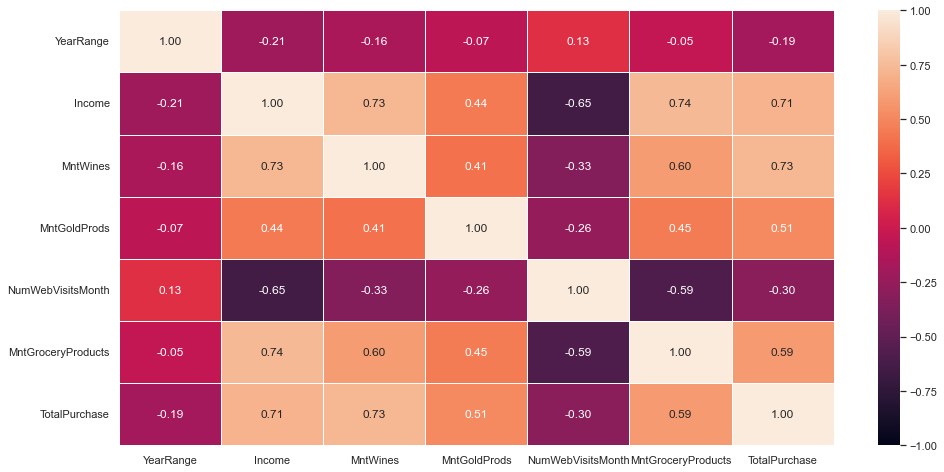

In [4]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(newCustomerData[['YearRange', 'Education', 'Marital_Status', 
                            'Income','MntWines','MntGoldProds',
                            'NumWebVisitsMonth','MntGroceryProducts',
                            'TotalPurchase']].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", linewidths=.5)

# Formalizing Variable Types

In [8]:
newCustomerData['NumWebVisitsMonth'] = newCustomerData['NumWebVisitsMonth'].astype("category")
newCustomerData['YearRange'] = newCustomerData['YearRange'].astype("category")
newCustomerData['Dt_Customer'] = newCustomerData['Dt_Customer'].astype("datetime64[ns]")

In [9]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2188 non-null   int64         
 1   Year_Birth           2188 non-null   int64         
 2   Education            2188 non-null   object        
 3   Marital_Status       2188 non-null   object        
 4   Income               2188 non-null   float64       
 5   Kidhome              2188 non-null   int64         
 6   Teenhome             2188 non-null   int64         
 7   Dt_Customer          2188 non-null   datetime64[ns]
 8   Recency              2188 non-null   int64         
 9   MntWines             2188 non-null   int64         
 10  MntFruits            2188 non-null   int64         
 11  MntMeatProducts      2188 non-null   int64         
 12  MntFishProducts      2188 non-null   int64         
 13  MntSweetProducts     2188 non-nul

In [10]:
newCustomerData.describe()

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,TotalChild,HaveChild
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,...,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,1093.500000,1968.852834,51483.184644,0.449269,0.511426,49.266910,303.828154,26.203839,162.244059,37.091865,...,2.319927,4.068099,2.606947,5.825411,0.009141,225.539762,14.820384,0.435558,0.960695,0.722121
std,631.765516,11.686082,20025.920179,0.539847,0.543791,28.911119,335.984981,39.543642,212.817373,54.018983,...,1.816710,2.618988,2.724004,3.211299,0.095191,275.782652,7.571045,0.871201,0.750741,0.448056
min,0.000000,1940.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,546.750000,1959.000000,35616.750000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,1.000000,2.000000,0.000000,3.000000,0.000000,25.000000,8.000000,0.000000,0.000000,0.000000
50%,1093.500000,1970.000000,51222.500000,0.000000,0.000000,50.000000,175.500000,8.000000,67.000000,12.000000,...,2.000000,4.000000,2.000000,5.000000,0.000000,90.000000,15.000000,0.000000,1.000000,1.000000
75%,1640.250000,1977.000000,67546.000000,1.000000,1.000000,74.000000,505.000000,33.000000,226.000000,49.250000,...,3.000000,6.000000,4.000000,8.000000,0.000000,347.250000,21.000000,1.000000,1.000000,1.000000
max,2187.000000,1996.000000,94384.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,...,15.000000,11.000000,11.000000,13.000000,1.000000,1306.000000,39.000000,5.000000,3.000000,1.000000


In [6]:
# import numpy as np
# import pandas as pd
# import seaborn as sb
# import matplotlib.pyplot as plt
# sb.set()
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder

# customerData = pd.read_csv('C:/Users/LDW/Documents/GitHub/SC1015-Group9/dataset/train_data.csv')
# colOfNum = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']
# colOfCat = ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']
# print("Column of numerical data:",colOfNum)
# print()
# print("Column of categorical data:",colOfCat)
# # Column of numerical data: ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']
# # Column of categorical data: ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder

# # define one hot encoding
# encoder = OneHotEncoder(sparse=False)

# # initialise variables
# edu, ms, dtCus, yr, ac3, ac4, ac5, ac1, ac2, com, res, kid, teen =\
# [pd.DataFrame(newCustomerData[categories]) for categories in colOfCat]

# edu_dict, ms_dict, dtCus_dict, yr_dict, ac3_dict, ac4_dict,\
# ac5_dict, ac1_dict, ac2_dict, com_dict, res_dict, kid_dict,\
# teen_dict = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# var_list = [edu, ms, dtCus, yr, ac3, ac4, ac5, ac1, ac2, com, res, kid, teen]
# dict_list = [edu_dict, ms_dict, dtCus_dict, yr_dict, ac3_dict, ac4_dict,\
# ac5_dict, ac1_dict, ac2_dict, com_dict, res_dict, kid_dict, teen_dict]


# def make_dict(a_dict, data, onehot):
#     for i in range(len(data)):
#         key = data[i][0]
#         value = onehot[i]
#         a_dict[key] = value

# def prepare_data(category):
#     category = category.squeeze()
#     category = pd.unique(category)
#     data = [[elements] for elements in category]
#     data = asarray(data)
#     return data

# for i in range(len(dict_list)):
#     data = prepare_data(var_list[i])
#     onehot = encoder.fit_transform(data)
#     make_dict(dict_list[i], data, onehot)

In [18]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2188 non-null   int64         
 1   Year_Birth           2188 non-null   int64         
 2   Education            2188 non-null   object        
 3   Marital_Status       2188 non-null   object        
 4   Income               2188 non-null   float64       
 5   Kidhome              2188 non-null   int64         
 6   Teenhome             2188 non-null   int64         
 7   Dt_Customer          2188 non-null   datetime64[ns]
 8   Recency              2188 non-null   int64         
 9   MntWines             2188 non-null   int64         
 10  MntFruits            2188 non-null   int64         
 11  MntMeatProducts      2188 non-null   int64         
 12  MntFishProducts      2188 non-null   int64         
 13  MntSweetProducts     2188 non-nul

# Visualization 

<Figure size 144x432 with 0 Axes>

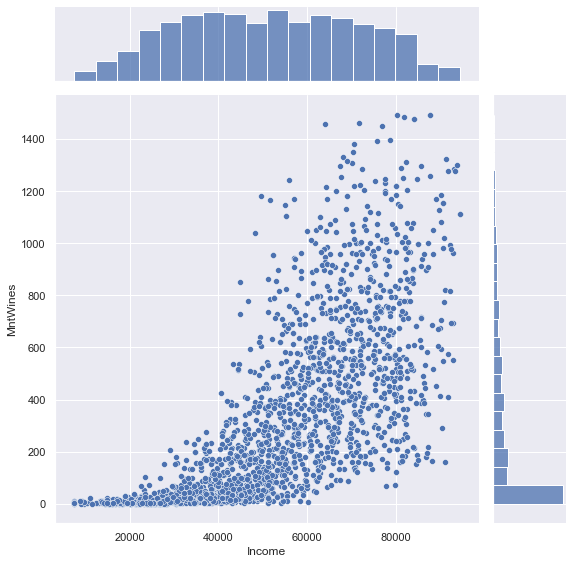

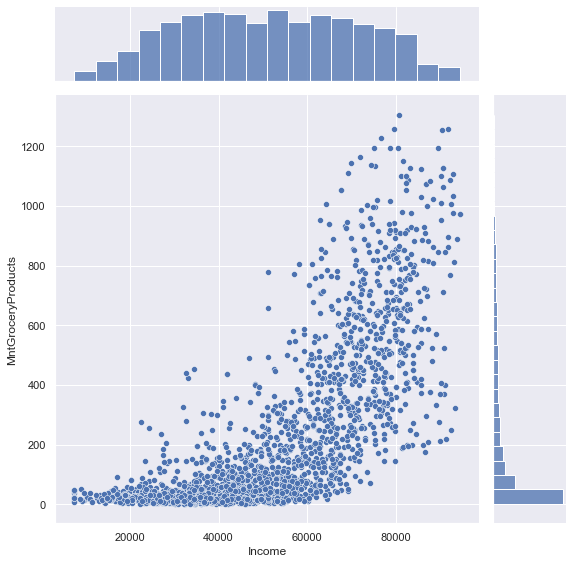

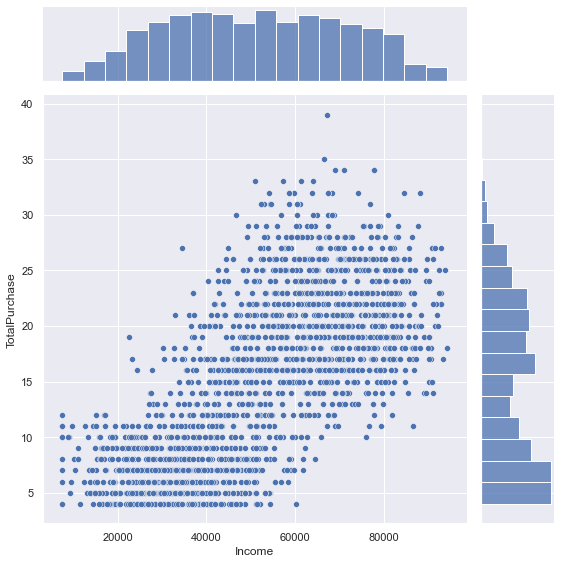

In [11]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = newCustomerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "TotalPurchase", height = 8)

In [14]:
# # Import the encoder from sklearn
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()

# # OneHotEncoding of categorical predictors (not the response)
# customerData_cat = newCustomerData[['NumWebVisitsMonth','YearRange']]
# ohe.fit(customerData_cat)
# customerData_cat_ohe = pd.DataFrame(ohe.transform(customerData_cat).toarray(), 
#                                   columns=ohe.get_feature_names_out(customerData_cat.columns))

# # Check the encoded variables
# customerData_cat_ohe.info()

# Machine Learning

## Linear Regression

### 1a) train_test_split Method (numerical VS numerical variables)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def normal_splitting(X, Y):
    

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)


Intercept 	: b =  [-299.47054849]
Coefficients 	: a =  [[0.01016093]]


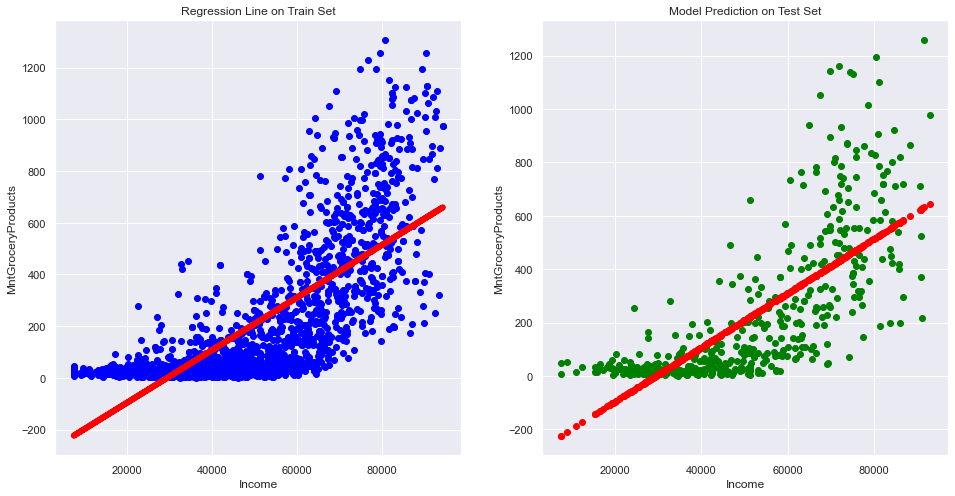

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5517029031220869
Mean Squared Error (MSE) 	: 33743.4120828668

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5372918404285804
Mean Squared Error (MSE) 	: 36483.84009190989

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 33743.4120828668

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 36483.84009190989



In [46]:
linreg1 = LinearRegression()
linreg1.fit(X_train, Y_train)

print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

regline_x = X_train
regline_y = linreg1.intercept_ + linreg1.coef_ * X_train

# Predict Response corresponding to Predictors
Y_train_pred = linreg1.predict(X_train)
Y_test_pred = linreg1.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(X_train, Y_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(X_test, Y_test, color = "green")
axes[1].scatter(X_test, Y_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='MntGroceryProducts')

# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(X_train, Y_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

# plt.subplot(1, 2, 2)
# plt.scatter(X_test, Y_test, color = "green")
# plt.scatter(X_test, Y_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [47]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
totalPurchases = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
income = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
income_train, income_test, totalPurchases_train, totalPurchases_test = train_test_split(income, totalPurchases, test_size = 0.2)

# Check the sample sizes
print("Train Set :", income_train.shape, totalPurchases_train.shape)
print("Test Set  :", income_test.shape, totalPurchases_test.shape)

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)


Intercept 	: b =  [1.10265415]
Coefficients 	: a =  [[0.00026716]]


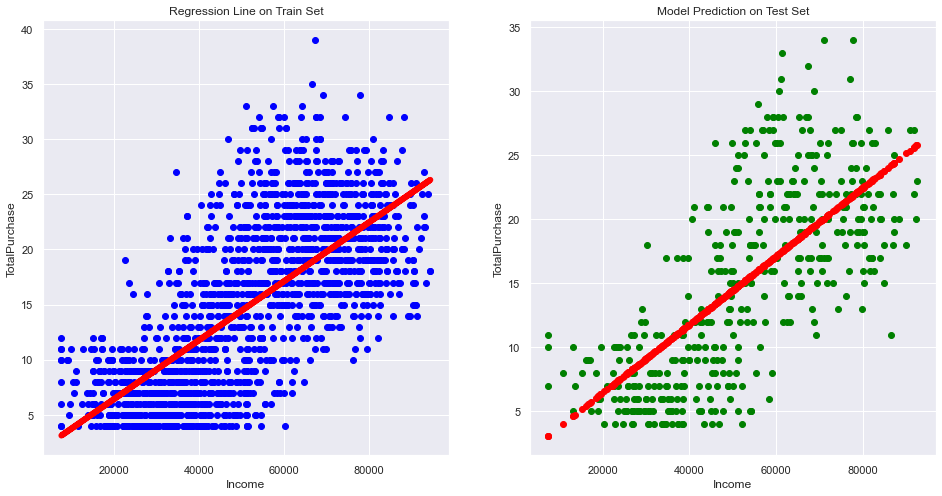

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5042325375417773
Mean Squared Error (MSE) 	: 28.366727317698537

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5096020645037735
Mean Squared Error (MSE) 	: 28.244974768888188

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.366727317698537

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 28.244974768888188



In [48]:
linreg2 = LinearRegression()
linreg2.fit(income_train, totalPurchases_train)

print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

regline_x = income_train
regline_y = linreg2.intercept_ + linreg2.coef_ * income_train

# Predict Response corresponding to Predictors
totalPurchases_train_pred = linreg2.predict(income_train)
totalPurchases_test_pred = linreg2.predict(income_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(income_train, totalPurchases_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(income_test, totalPurchases_test, color = "green")
axes[1].scatter(income_test, totalPurchases_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='TotalPurchase')
    
# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(income_train, totalPurchases_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

# plt.subplot(1, 2, 2)
# plt.scatter(income_test, totalPurchases_test, color = "green")
# plt.scatter(income_test, totalPurchases_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_train, totalPurchases_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_test, totalPurchases_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()

### 1b) train_test_split Method (numerical VS categorical variables)

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-295.30279986]
Variables: 
Response:  MntGroceryProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5671626753932002
Mean Squared Error (MSE) 	: 32741.808705307187

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5797169606168215
Mean Squared Error (MSE) 	: 32541.791519932212

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 32741.808705307187

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 32541.791519932212



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


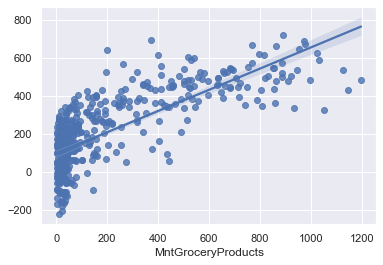

In [115]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)
Model intercept:  [606.02098987]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  MntGroceryProducts
Predictors:  NumWebVisitsMonth, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.33542601715637466
Mean Squared Error (MSE) 	: 50271.43681880212

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3793920359268106
Mean Squared Error (MSE) 	: 48052.60524459705

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 50271.43681880212

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 48052.60524459705



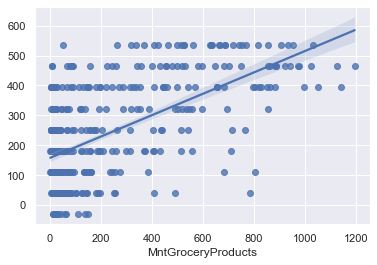

In [40]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)
Model intercept:  [-294.04471743]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  MntGroceryProducts
Predictors:  Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5413251514259922
Mean Squared Error (MSE) 	: 34696.27801527625

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5779409934401747
Mean Squared Error (MSE) 	: 32679.301598124996

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 34696.27801527625

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 32679.301598124996



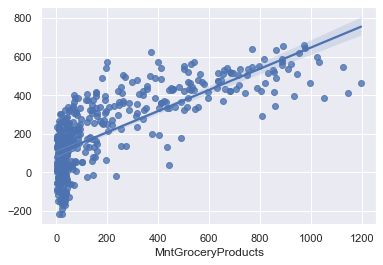

In [149]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (Numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 2) (1750, 1)
Test Set  : (438, 2) (438, 1)
Model intercept:  [-7.06780843]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  TotalPurchase
Predictors:  NumWebVisitsMonth, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5448089061731833
Mean Squared Error (MSE) 	: 26.05536472859866

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5462395654658112
Mean Squared Error (MSE) 	: 25.92512478703796

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 26.05536472859866

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 25.92512478703796



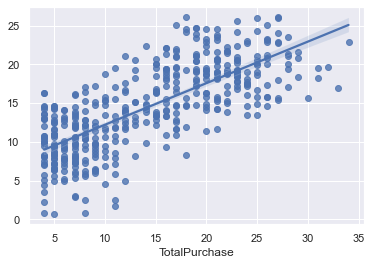

In [146]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)
Model intercept:  [1.13256896]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  TotalPurchase
Predictors:  Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5021817575339009
Mean Squared Error (MSE) 	: 28.495363929372246

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5142067128313693
Mean Squared Error (MSE) 	: 27.755288103690308

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.495363929372246

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 27.755288103690308



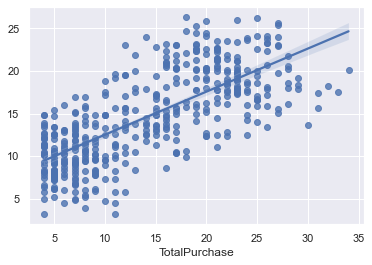

In [150]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [1.81344677]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  TotalPurchase
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5036773456049624
Mean Squared Error (MSE) 	: 28.409755723931237

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5136678827554937
Mean Squared Error (MSE) 	: 27.78607359288887

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.409755723931237

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 27.78607359288887



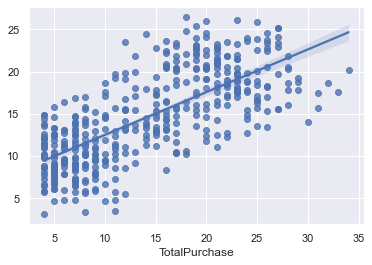

In [125]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-1.88828724]
Variables: 
Response:  MntGoldProds
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22655567304763724
Mean Squared Error (MSE) 	: 1967.1370847328556

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.23918240798896773
Mean Squared Error (MSE) 	: 1940.7857141147492

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1967.1370847328556

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1940.7857141147492



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


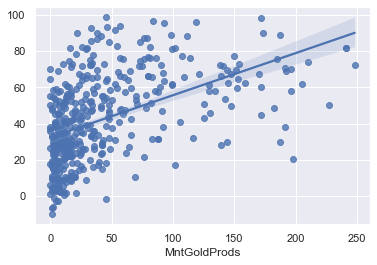

In [119]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGoldProds']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-364.85647395]
Variables: 
Response:  MntWines
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5512389108444293
Mean Squared Error (MSE) 	: 51412.58279101082

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5496225199285814
Mean Squared Error (MSE) 	: 47383.93027781437

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 51412.58279101082

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 47383.93027781437



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


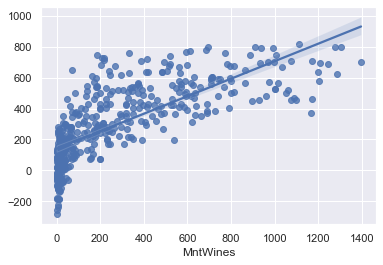

In [120]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntWines']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-244.12414182]
Variables: 
Response:  MntMeatProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5298314867035101
Mean Squared Error (MSE) 	: 20978.010528691313

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5465135767028406
Mean Squared Error (MSE) 	: 21698.42942809571

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 20978.010528691313

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 21698.42942809571



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


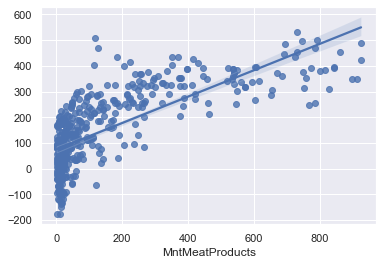

In [121]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntMeatProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-25.56822745]
Variables: 
Response:  MntFishProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3428393307220522
Mean Squared Error (MSE) 	: 1948.5482055788827

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.32287602323203124
Mean Squared Error (MSE) 	: 1840.102206413539

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1948.5482055788827

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1840.102206413539



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


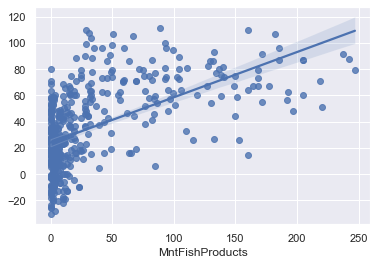

In [122]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFishProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-20.11040007]
Variables: 
Response:  MntSweetProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3400985707737779
Mean Squared Error (MSE) 	: 1100.5683609639987

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.34760978259983655
Mean Squared Error (MSE) 	: 964.9622577943579

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1100.5683609639987

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 964.9622577943579



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


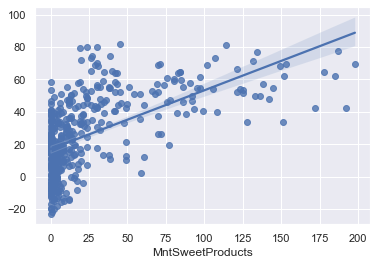

In [123]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntSweetProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-25.61043058]
Variables: 
Response:  MntFruits
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.32539052819180825
Mean Squared Error (MSE) 	: 1065.3138933227287

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.29762812746901834
Mean Squared Error (MSE) 	: 1049.4317822648634

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1065.3138933227287

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1049.4317822648634



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


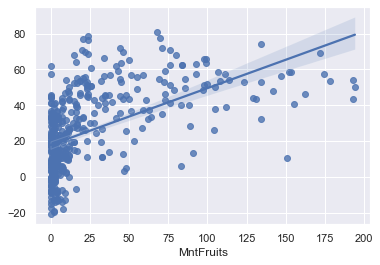

In [124]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFruits']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

### 2) K-Fold Method 

In [4]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2188 non-null   int64  
 1   Year_Birth           2188 non-null   int64  
 2   Education            2188 non-null   object 
 3   Marital_Status       2188 non-null   object 
 4   Income               2188 non-null   float64
 5   Kidhome              2188 non-null   int64  
 6   Teenhome             2188 non-null   int64  
 7   Dt_Customer          2188 non-null   object 
 8   Recency              2188 non-null   int64  
 9   MntWines             2188 non-null   int64  
 10  MntFruits            2188 non-null   int64  
 11  MntMeatProducts      2188 non-null   int64  
 12  MntFishProducts      2188 non-null   int64  
 13  MntSweetProducts     2188 non-null   int64  
 14  MntGoldProds         2188 non-null   int64  
 15  NumDealsPurchases    2188 non-null   i

In [5]:
train_data = pd.read_csv('dataset/new_train_data.csv')
test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
train_data.drop(dropColumn,inplace= True,axis = 1)
test_data.drop(dropColumn,inplace= True,axis = 1)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1751 non-null   int64  
 1   Education            1751 non-null   object 
 2   Marital_Status       1751 non-null   object 
 3   Complain             1751 non-null   int64  
 4   NumWebVisitsMonth    1751 non-null   int64  
 5   YearRange            1751 non-null   int64  
 6   HaveChild            1751 non-null   int64  
 7   AcceptedCmp          1751 non-null   int64  
 8   Income               1751 non-null   float64
 9   Kidhome              1751 non-null   int64  
 10  Teenhome             1751 non-null   int64  
 11  Dt_Customer          1751 non-null   object 
 12  Recency              1751 non-null   int64  
 13  MntWines             1751 non-null   int64  
 14  MntFruits            1751 non-null   int64  
 15  MntMeatProducts      1751 non-null   i

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           437 non-null    int64  
 1   Education            437 non-null    object 
 2   Marital_Status       437 non-null    object 
 3   Complain             437 non-null    int64  
 4   NumWebVisitsMonth    437 non-null    int64  
 5   YearRange            437 non-null    int64  
 6   HaveChild            437 non-null    int64  
 7   AcceptedCmp          437 non-null    int64  
 8   Income               437 non-null    float64
 9   Kidhome              437 non-null    int64  
 10  Teenhome             437 non-null    int64  
 11  Dt_Customer          437 non-null    object 
 12  Recency              437 non-null    int64  
 13  MntWines             437 non-null    int64  
 14  MntFruits            437 non-null    int64  
 15  MntMeatProducts      437 non-null    int

In [8]:
train_data['NumWebVisitsMonth'].describe()

count    1751.000000
mean        5.326670
std         2.273719
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: NumWebVisitsMonth, dtype: float64

In [9]:
test_data['NumWebVisitsMonth'].describe()

count    437.000000
mean       5.304348
std        2.169705
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: NumWebVisitsMonth, dtype: float64

In [10]:
newCustomerData['NumWebVisitsMonth'].describe()

count    2188.000000
mean        5.322212
std         2.252859
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: NumWebVisitsMonth, dtype: float64

Train Set : (1751, 12) (1751, 1)
Test Set  : (437, 12) (437, 1)
Model intercept:  [-3407.23017712]
Variables: 
Response:  MntGroceryProducts
Predictors:  YearRange, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6908871890323582
Mean Squared Error (MSE) 	: 23293.727321617735

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6541805979697355
Mean Squared Error (MSE) 	: 27202.010022333347

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 23293.727321617735

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 27202.010022333347



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


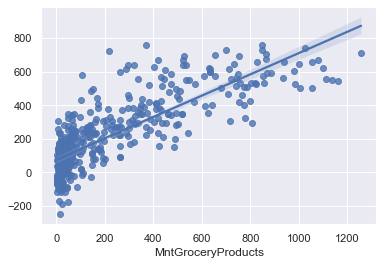

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def kfold_linreg(train_response, test_response, train_predictor, test_predictor):
    Y_train = pd.DataFrame(train_response) # Response
    Y_test = pd.DataFrame(test_response)
    X_train = pd.DataFrame(train_predictor) # Predictors (Categorical)
    X_test = pd.DataFrame(test_predictor) # Predictors (Categorical)
    income_train = pd.DataFrame(train_data['Income']) # Predictor (numercial)
    income_test = pd.DataFrame(test_data['Income']) # Predictor (numercial)
    
    for col_name in Y_train.columns:
        response = col_name
    for col_name in X_train.columns:
        cat_pred = col_name
        
    X_train = pd.get_dummies(data=X_train, drop_first=True)
    X_train = pd.concat([X_train, income_train], axis=1) # For multi-variate linear regression with numerical predictor variable
    X_test = pd.get_dummies(data=X_test, drop_first=True)
    X_test = pd.concat([X_test, income_test], axis=1) # For multi-variate linear regression with numerical predictor variable
    
    # train_data.head(1100)
    # train_data['NumWebVisitsMonth'].isnull().describe()
    # X_test.info()
    # Y_train['NumWebVisitsMonth'].isnull().describe()
    
    # Check the sample sizes
    print("Train Set :", X_train.shape, Y_train.shape)
    print("Test Set  :", X_test.shape, Y_test.shape)

    model = LinearRegression()
    model.fit(X_train,Y_train)

    print("Model intercept: ", model.intercept_)

    predictions = model.predict(X_test)
    predictions

    sb.regplot(Y_test,predictions)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    print("Variables: ")
    print("Response: ", response)
    print("Predictors: ", cat_pred + ", Income")
    print()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
    print()
    # Check the Goodness of Fit (on Train Data)
    print("Prediction Accuracy of Model \tTrain Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
    print()

    
response_var = ["MntGroceryProducts", "TotalPurchase", "MntWines", "MntGoldProds"]
predictors = ["Education", "Marital_Status", "Income", "TotalChild", "HaveChild", "NumWebVisitsMonth", "YearRange"]

# train_data[predictors].info()
kfold_linreg(train_data[response_var[0]], test_data[response_var[0]], 
             train_data[predictors], test_data[predictors])

Train Set : (1751, 12) (1751, 1)
Test Set  : (437, 12) (437, 1)
Model intercept:  [70.21232686]
Variables: 
Response:  TotalPurchase
Predictors:  YearRange, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5538203001099888
Mean Squared Error (MSE) 	: 25.402039914079396

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5839510663819796
Mean Squared Error (MSE) 	: 24.441069318513083

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 25.402039914079396

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 24.441069318513083



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


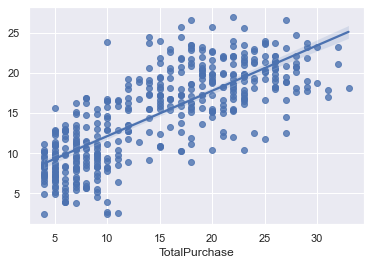

In [58]:
kfold_linreg(train_data[response_var[1]], test_data[response_var[1]], 
             train_data[predictors], test_data[predictors])

Train Set : (1751, 5) (1751, 1)
Test Set  : (437, 5) (437, 1)
Model intercept:  [-387.26636195]
Variables: 
Response:  MntWines
Predictors:  Education, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	:

C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 0.552280330157403
Mean Squared Error (MSE) 	: 50707.25393678334

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5474099079918081
Mean Squared Error (MSE) 	: 50301.63663400319

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 50707.25393678334

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 50301.63663400319



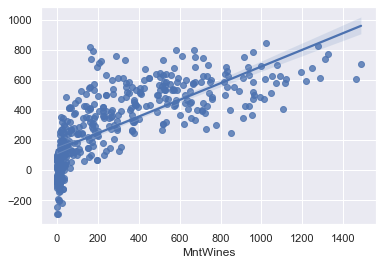

In [59]:
kfold_linreg(train_data[response_var[2]], test_data[response_var[2]], 
             train_data[predictors[0]], test_data[predictors[0]])

Train Set : (1751, 5) (1751, 1)
Test Set  : (437, 5) (437, 1)
Model intercept:  [-9.95137689]
Variables: 
Response:  MntGoldProds
Predictors:  Education, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2328328581163407
Mean Squared Error (MSE) 	: 1895.6723749024027

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2080069131316078
Mean Squared Error (MSE) 	: 2243.9352936551236

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1895.6723749024027

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 2243.9352936551236



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


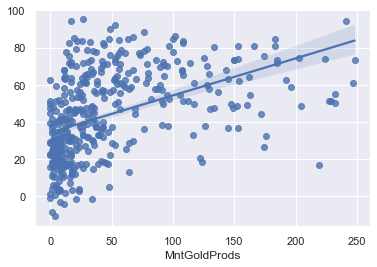

In [60]:
kfold_linreg(train_data[response_var[3]], test_data[response_var[3]], 
             train_data[predictors[0]], test_data[predictors[0]])

## Exponential Regression (for reference)

In [49]:
X = np.array(newCustomerData['Income'])
print(X)
Y = np.array(newCustomerData['MntGroceryProducts'])
print(Y)

[58138. 46344. 71613. ... 56981. 69245. 52869.]
[806   9 287 ... 297 324  66]


In [50]:
ylog_data = np.log(Y)
print(ylog_data)
  
curve_fit = np.polyfit(X, ylog_data, 1)
print(curve_fit)

[6.69208374 2.19722458 5.65948222 ... 5.69373214 5.78074352 4.18965474]
[6.02032772e-05 1.37033299e+00]


In [51]:
y = np.exp(1.37938297e+00) * np.exp(6.00146653e-05*X)
  
print(y)

[130.12760959  64.11655627 292.13417382 ... 121.39851102 253.4327416
  94.85015303]


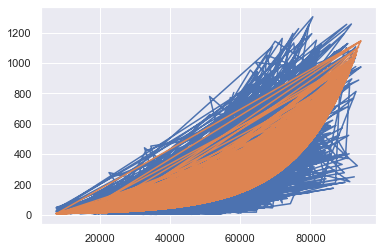

In [52]:
# Blue 
plt.plot(X, Y)
  
# best fit in orange
plt.plot(X, y)

In [54]:
# sample_data = pd.DataFrame(newCustomerData['NumWebVisitsMonth'])
# sample_data = sample_data.sample(n=1000,replace="False")
# sample_data.shape

In [102]:
# newCustomerData['Income'].describe()